In [1]:
# 库文件
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# 库文件
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split

import numpy as np
from scipy.optimize import minimize
from sklearn.metrics.pairwise import rbf_kernel
import optuna

import numpy as np
from sklearn.svm import SVR
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd


import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split

import numpy as np
from scipy.optimize import minimize
from sklearn.metrics.pairwise import rbf_kernel


import numpy as np
from sklearn.svm import SVR
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
# 库文件
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 设置中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)  # 替换为你的中文字体文件路径

from itertools import chain



In [2]:
# 读取Excel文件
excel_path = f'C:\\Users\\haokw\\Documents\\GitHub\\gaolu\\MPC\\高炉\\0数据\\论文数据.xlsx'
df_sheet = pd.read_excel(excel_path)
# excel_path = f'C:\\Users\\haokw\\Documents\\GitHub\\gaolu\\MPC\\高炉\\0数据\\数据-时间戳.xlsx'
# df_sheet = pd.read_excel(excel_path, sheet_name='Sheet4') 
# print(df_sheet.info())
print(df_sheet.columns)


Index(['主参数时间戳', '热风压力', '热风温度', '富氧率', '喷煤量', 'Unnamed: 5', '鼓风湿度',
       'Unnamed: 7', '炉腹煤气量', 'si'],
      dtype='object')


In [3]:
# 定义输入输出参数
input_term = ['热风压力', '热风温度', '富氧率', '喷煤量', '鼓风湿度', '炉腹煤气量']
output_term = ['si']
time_term= '主参数时间戳'


C:\Users\haokw\AppData\Local\Temp\ipykernel_39388\4164803511.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx] = interpolated_value
C:\Users\haokw\AppData\Local\Temp\ipykernel_39388\4164803511.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx] = interpolated_value
C:\Users\haokw\AppData\Local\Temp\ipykernel_39388\4164803511.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx] = interpolated_value
C:\Users\haok

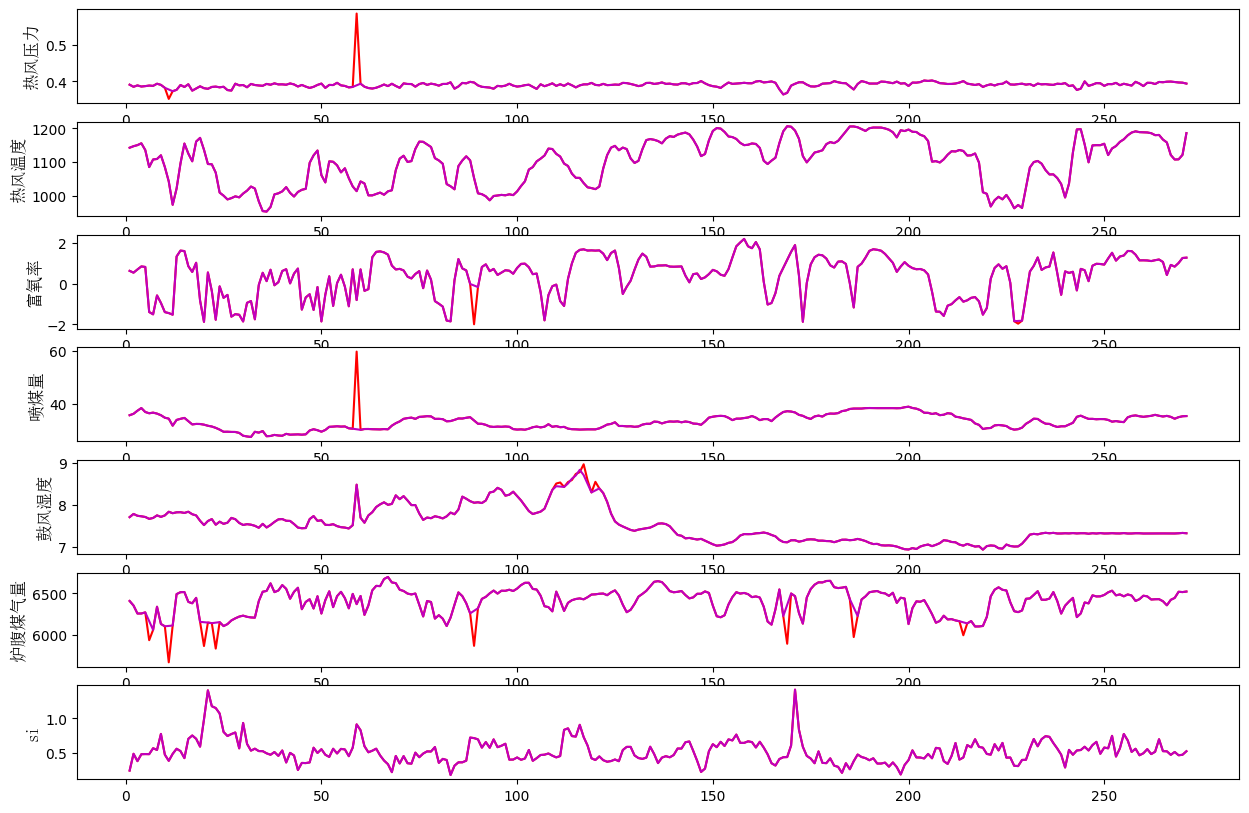

In [4]:
# 异常数据处理-处理前后对比
# 创建数据框副本以避免修改原始数据
df_sheet_process = df_sheet.copy()
# 定义一个函数，用前后两个值的差值按照距离进行加权替换异常值
def replace_outliers_with_weighted_diff(x, y):
    # 计算列的中位数
    median_value = y.median()
    # 检测异常值的索引
    outliers_index = (y - median_value).abs() > 2.56 * y.std()  # 使用标准差作为阈值
    
    # 遍历异常值的索引
    for idx in outliers_index[outliers_index].index:
        # 获取异常值前一个和后一个值的索引
        prev_idx = idx - 1 if idx - 1 >= 0 else idx
        next_idx = idx + 1 if idx + 1 < len(y) else idx
        # 计算当前 x 与前后两个 x 的距离
        dist_prev = abs(x[idx] - x[prev_idx])
        dist_next = abs(x[next_idx] - x[idx])
        total_dist = dist_prev + dist_next
        # 计算权重
        weight_prev = dist_next / total_dist
        weight_next = dist_prev / total_dist
        # 计算前后两个值的差值
        diff = y[next_idx] - y[prev_idx]
        # 根据权重进行插值
        interpolated_value = y[prev_idx] + weight_prev * diff
        # 用插值结果替代异常值
        y[idx] = interpolated_value




# 画出数据
def plot_subplot(data_x,data_y_yuan,data_y,column):
    plt.plot(data_x,data_y_yuan,'r-')
    plt.plot(data_x,data_y,'m-')
    # plt.xlabel(time_term, fontproperties=font)  # 使用中文标签
    plt.ylabel(column, fontproperties=font)  # 使用中文标签
    # 使用中文标签


# 对指定列应用替代异常值的函数
# 对指定列应用替代异常值的函数
replace_outliers_with_weighted_diff(df_sheet_process['主参数时间戳'], df_sheet_process[input_term[0]])
replace_outliers_with_weighted_diff(df_sheet_process['主参数时间戳'], df_sheet_process[input_term[1]])
replace_outliers_with_weighted_diff(df_sheet_process['主参数时间戳'], df_sheet_process[input_term[2]])
replace_outliers_with_weighted_diff(df_sheet_process['主参数时间戳'], df_sheet_process[input_term[3]])
replace_outliers_with_weighted_diff(df_sheet_process['主参数时间戳'], df_sheet_process[input_term[4]])
replace_outliers_with_weighted_diff(df_sheet_process['主参数时间戳'], df_sheet_process[input_term[5]])

plt.figure(figsize=(15, 10))
for idx, column in enumerate(input_term+output_term):
    
    plt.subplot(len(input_term+output_term), 1, idx+1)
    plot_subplot(df_sheet_process[time_term].values,df_sheet[column].values,df_sheet_process[column].values,column)




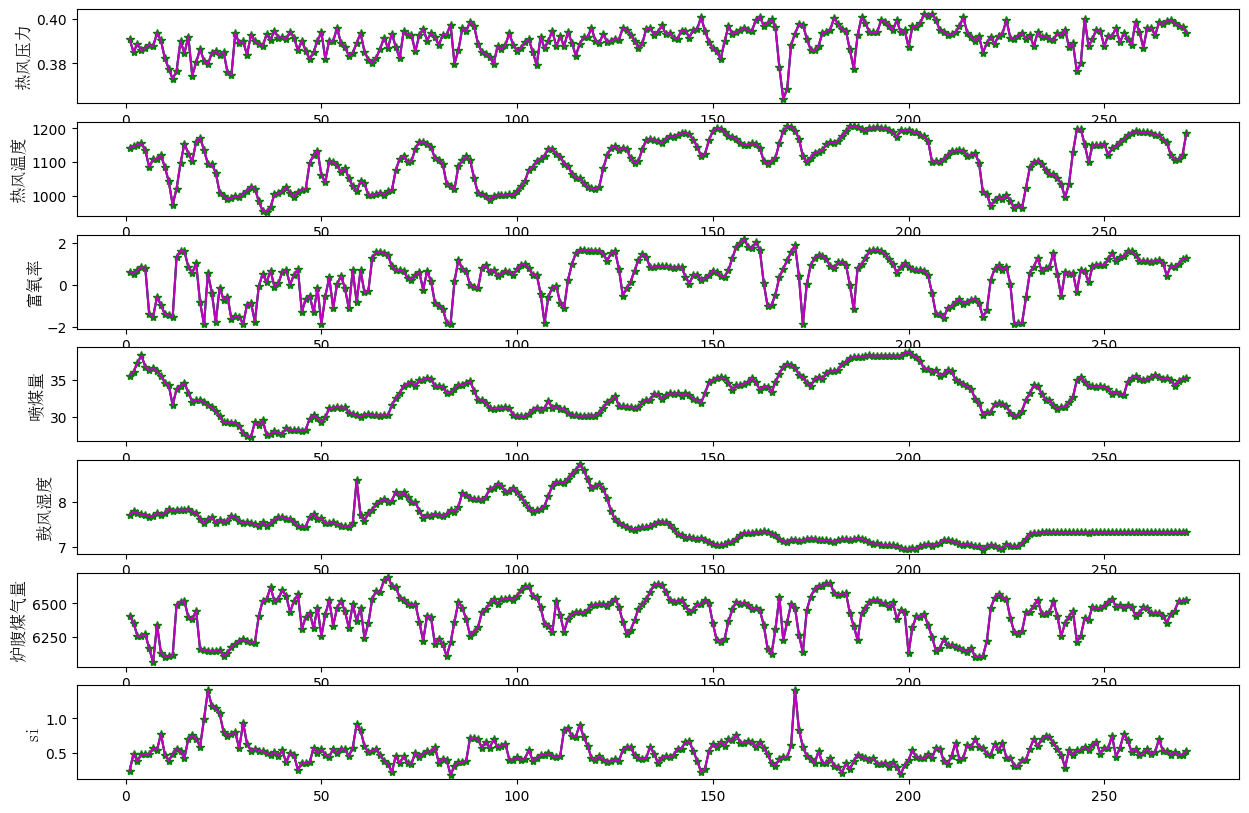

In [5]:
# 画出选取的数据
def plot_subplot(data_x,data_y,column,index_predict,index_gaolu):
    plt.plot(data_x,data_y,'-')
    plt.plot(data_x[index_gaolu],data_y[index_gaolu],'g*-')
    plt.plot(data_x[index_predict],data_y[index_predict],'m-')
    
    # plt.xlabel(time_term, fontproperties=font)  # 使用中文标签
    plt.ylabel(column, fontproperties=font)  # 使用中文标签



# length1 = 300
# start1 = 430
# length2 = 300
# start2 = 230
# print((start2+length2-start1)/length2)
    


length2 = 270
start2 = 0
index_gaolu     = range(start2, start2+length2+1, 1)
index_predict   = index_gaolu
# index = range(1, 7572, 1)


plt.figure(figsize=(15, 10))
for idx, column in enumerate(input_term+output_term):
    plt.subplot(len(input_term+output_term), 1, idx+1)
    plot_subplot(df_sheet_process[time_term].values,df_sheet_process[column].values,column,index_predict,index_gaolu)


In [6]:
# 数据归一化、逆归一化
from sklearn.preprocessing import MinMaxScaler

# 将数据存储为字典，每个键对应一列数据
original_data_dict = {
    input_term[0]:   df_sheet_process[input_term[0]].values,
    input_term[1]:   df_sheet_process[input_term[1]].values,
    input_term[2]:   df_sheet_process[input_term[2]].values,
    input_term[3]:   df_sheet_process[input_term[3]].values,
    input_term[4]:   df_sheet_process[input_term[4]].values,
    input_term[5]:   df_sheet_process[input_term[5]].values,
    output_term[0]:  df_sheet_process[output_term[0]].values
}

# 初始化缩放器
scalers = {}

# 进行拟合
for column, data in original_data_dict.items():
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data.reshape(-1, 1))  # 保证数据是列向量
    scalers[column] = scaler

# 进行归一化
normalized_data_dict = {}
for column, scaler in scalers.items():
    normalized_data_dict[column] = scaler.transform(original_data_dict[column].reshape(-1, 1)).flatten()

# 进行反归一化
original_data_dict = {}
for column, scaler in scalers.items():
    original_data_dict[column] = scaler.inverse_transform(normalized_data_dict[column].reshape(-1, 1)).flatten()


In [7]:
# 组合训练数据--拆分训练、测试集
test_size = 0.25
def make_data(u1_data,u2_data,u3_data,u4_data,u5_data,u6_data,y1_data,test_size):
    u1_data = u1_data
    u2_data = u2_data
    u3_data = u3_data
    u4_data = u4_data
    u5_data = u5_data
    u6_data = u6_data

    u1_data_1 = np.roll(u1_data, 1)
    u2_data_1 = np.roll(u2_data, 1)
    u3_data_1 = np.roll(u3_data, 1)
    u4_data_1 = np.roll(u4_data, 1)
    u5_data_1 = np.roll(u5_data, 1)
    u6_data_1 = np.roll(u6_data, 1)

    y1_data = y1_data

    X = np.column_stack((   u1_data  [1:-1], u2_data  [1:-1], u3_data  [1:-1], u4_data  [1:-1], u5_data  [1:-1], u6_data  [1:-1],
                            u1_data_1[1:-1], u2_data_1[1:-1], u3_data_1[1:-1], u4_data_1[1:-1], u5_data_1[1:-1], u6_data_1[1:-1]
                            ,y1_data  [1:-1]
                            )
                        )
    y = y1_data[2:]

    # 使用 reshape 转换形状(457, 10) (457, 2)--->(457, 1, 10) (457, 1, 2)
    # X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
    # y_reshaped = y.reshape((y.shape[0], 1, y.shape[1]))
    X_reshaped = X
    y_reshaped = y
    # print('ffffffffffffffff')
    # print(y_reshaped.shape)



    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, 
                                                        test_size=test_size, 
                                                        random_state=42, 
                                                        shuffle=True)
                                                        # shuffle=False)


    # print(X_reshaped)
    # print('gggggggg')
    # print(X_train)
    # print(X_test)
    # print('gggggggg')
    # print(y_reshaped)
    # print('gggggggg')
    # print(y_train)
    # print(y_test)

    # y_test = y_test.reshape((y_test.shape[0],y_test.shape[2]))
    # y_train = y_train.reshape((y_train.shape[0],y_train.shape[2]))
    
    print(X_train.shape,y_train.shape)
    print(X_test.shape,y_test.shape)

    return X_train, X_test, y_train, y_test


In [8]:
# 高炉模型列数据
u1_data = normalized_data_dict[input_term[0]][index_gaolu]
u2_data = normalized_data_dict[input_term[1]][index_gaolu]
u3_data = normalized_data_dict[input_term[2]][index_gaolu]
u4_data = normalized_data_dict[input_term[3]][index_gaolu]
u5_data = normalized_data_dict[input_term[4]][index_gaolu]
u6_data = normalized_data_dict[input_term[5]][index_gaolu]
y1_data = normalized_data_dict[output_term[0]][index_gaolu]
num_samples = y1_data.shape[0]



# print('Oxygen_enrich_rate:', u1_data.shape)
# print('Set_coal_amount:', u2_data.shape)
# print('hot_wind_temp:', u3_data.shape)
# print('hot_wind_presure:', u4_data.shape)
# print('temp:', y1_data.shape)
# print('Si_percent:', y2_data.shape)
# print(num_samples)

X_train, X_test,\
y_train, y_test = make_data(u1_data,u2_data,u3_data,u4_data,u5_data,u6_data,y1_data,
                                        test_size=test_size)


(201, 13) (201,)
(68, 13) (68,)


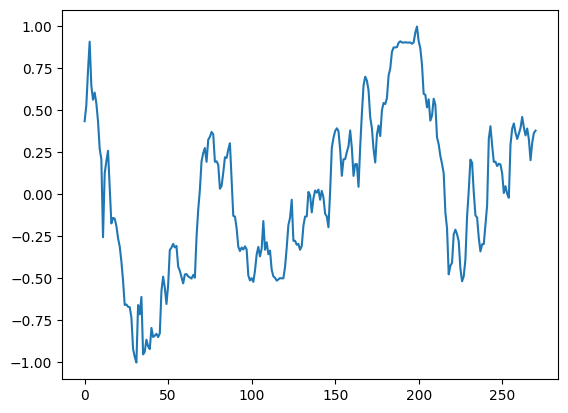

In [21]:
# plt.plot(u1_data)
# plt.plot(u2_data)
# plt.plot(u3_data)
plt.plot(u4_data)
# plt.plot(u5_data)
# plt.plot(u6_data)
# plt.plot(y1_data)


In [10]:
# 定义My_LS_SVRModel
class My_LS_SVRModel:
    def __init__(self, params):
        self.C = params[0]
        self.gamma = params[1]
        self.W_b = None
        self.X_train = None

    def model_train(self, X_train, y_train, K_train):
        def objective(W_b, X, y, C):
            y_pred = np.dot(K_train, W_b[:-1]) + W_b[-1]
            errors = y - y_pred
            loss = 0.5 * np.dot(W_b[:-1], W_b[:-1]) + C * np.sum(errors**2)
            return loss

        initial_W_b = np.zeros(X_train.shape[0] + 1)
        result = minimize(objective, initial_W_b, args=(X_train, y_train, self.C), method='L-BFGS-B')
        best_W_b = result.x
        return best_W_b

    def fit(self, X_train, y_train):
        self.X_train = X_train
        K_train = rbf_kernel(X_train, X_train, gamma=self.gamma)
        self.W_b = self.model_train(X_train, y_train, K_train)

    def predict(self, X_test):
        K_test = rbf_kernel(X_test, self.X_train, gamma=self.gamma)
        y_pred = np.dot(K_test, self.W_b[:-1]) + self.W_b[-1]
        return y_pred
    

# # 示例用法
# params = [8.78525340e+01, 2.01347249e-03]
# # 创建模型
# my_svr_model = My_LS_SVRModel(params=params)
# # 训练模型
# my_svr_model.fit(X_train, y_train)
# # 模型预测
# y_pred = my_svr_model.predict(X_test)


In [11]:
def your_fitness_function(trial, params, X_train, y_train, X_test, y_test):
    # 示例用法
    # 创建模型
    my_svr_model = My_LS_SVRModel(params=params)
    # 训练模型
    my_svr_model.fit(X_train, y_train)
    # 模型预测
    y_pred = my_svr_model.predict(X_test)        
    # 在这里计算适应值（均方根误差）
    errors = y_test - y_pred
    mse = np.sqrt(np.sum(errors**2)/X_test.shape[0])

    return mse


# 目标函数适配 Optuna 风格
def objective(trial, X_train, y_train, X_test, y_test):
    # 在搜索空间中定义超参数
    C = trial.suggest_float('C', 0.1, 20.0, log=True)
    gamma = trial.suggest_float('gamma', 1e-9, 10, log=True)

    # 调用你的目标函数
    params = [C, gamma]
    mse = your_fitness_function(trial, params, X_train, y_train, X_test, y_test)
    
    # 返回目标值（Optuna 默认是最小化目标）
    return mse

# 创建 Optuna 试验对象
study = optuna.create_study(direction='minimize')

# 执行优化
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), 
            n_trials = 10)


# 输出结果
print(f"Best Trial: {study.best_trial.params}")
print(f"Best MSE: {study.best_value}")




[I 2024-01-25 13:59:07,714] A new study created in memory with name: no-name-07b845f4-70ca-438c-86b3-7b82b52595a9
[I 2024-01-25 13:59:08,040] Trial 0 finished with value: 0.261526691843738 and parameters: {'C': 0.17097113509822684, 'gamma': 1.3333637689799355e-06}. Best is trial 0 with value: 0.261526691843738.
[I 2024-01-25 13:59:08,837] Trial 1 finished with value: 0.20382684818843855 and parameters: {'C': 10.203981145840563, 'gamma': 0.8833595225662757}. Best is trial 1 with value: 0.20382684818843855.
[I 2024-01-25 13:59:08,891] Trial 2 finished with value: 0.2615267799791402 and parameters: {'C': 2.6311105502247445, 'gamma': 2.4473336570019245e-07}. Best is trial 1 with value: 0.20382684818843855.
[I 2024-01-25 13:59:08,936] Trial 3 finished with value: 0.2615267261325661 and parameters: {'C': 9.750571618683773, 'gamma': 4.857440380143378e-09}. Best is trial 1 with value: 0.20382684818843855.
[I 2024-01-25 13:59:08,999] Trial 4 finished with value: 0.26152677607888064 and paramete

Best Trial: {'C': 0.12509527430386486, 'gamma': 0.05039484678985449}
Best MSE: 0.19435899069884088


In [12]:
# 绘制优化过程
optuna.visualization.plot_optimization_history(study)


In [16]:
# 创建模型
params =  [1,1]
# params = [study.best_trial.params['C'],study.best_trial.params['gamma']]
# params = result_position
my_svr_model = My_LS_SVRModel(params=params)
# 训练模型
my_svr_model.fit(X_train, y_train)
# 模型预测
y_pred_0 = my_svr_model.predict(X_test)


RMSE: si: 0.1255
MRE : si: 0.1898
MAPE: si: 18.9763%
MAE:0.0935,RMSE:0.3058,HR:0.6618,RE:0.0578


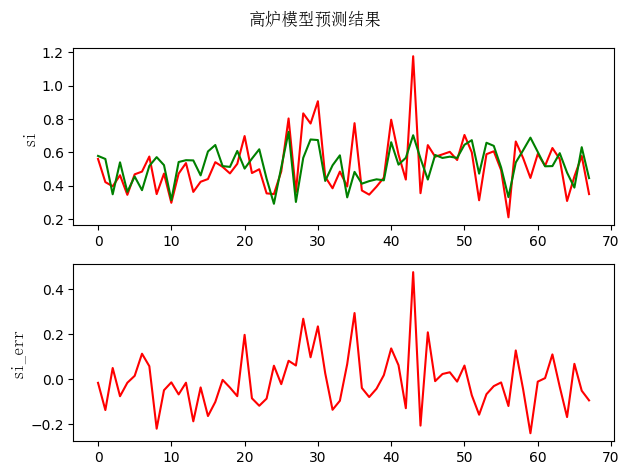

In [17]:
# 计算 RMSE、MRE
y_test = y_test

# y_test = y_test[:-1]
# y_pred_0 = y_pred_0[1:]

y_test_0 = scalers[output_term[0]].inverse_transform((y_test.reshape(-1, 1))).flatten()
y_pred_0_inverse_transform = scalers[output_term[0]].inverse_transform((y_pred_0.reshape(-1, 1))).flatten()

rmse_0 = np.sqrt(mean_squared_error(y_test_0, y_pred_0_inverse_transform))

# 计算 
mre_0 = np.mean(np.abs((y_test_0 - y_pred_0_inverse_transform) / y_test_0))

# 打印结果
print(f"RMSE: {output_term[0]}: {rmse_0:.4f}")
print(f"MRE : {output_term[0]}: { mre_0:.4f}")
mape_0 = np.mean(np.abs((y_test_0 - y_pred_0_inverse_transform) / y_test_0)) * 100
print(f"MAPE: {output_term[0]}: {mape_0:.4f}%")



output0 = y_test_0 - y_pred_0_inverse_transform
MAE = np.mean(np.abs(output0))
RMSE = np.sqrt(MAE)
HR = np.sum(np.abs(output0)<0.1)/len(output0)
RE = np.sum(output0**2)/np.sum(y_test**2)
print(f'MAE:{MAE:.4f},RMSE:{RMSE:.4f},HR:{HR:.4f},RE:{RE:.4f}')

plt.subplot(2, 1, 1)
plt.plot(y_test_0,'r')
plt.plot(y_pred_0_inverse_transform,'g')
plt.ylabel(output_term[0], fontproperties=font)  # 使用中文标签



plt.subplot(2, 1, 2)
plt.plot(output0,'r-')
plt.ylabel(output_term[0]+'_err', fontproperties=font)  # 使用中文标签
plt.suptitle('高炉模型预测结果', fontproperties=font)  # 添加整个图形的标题
plt.tight_layout()
plt.show()

